Numpy implementation of the forward pass of the simple RNN.

In [3]:
#################### 6.21 Numpy implementation of a simple RNN #################################################

import numpy as np

### Number of timesteps in the input sequence
timesteps = 100
### Dimensionality of the input feature space
input_features = 32
### Dimensionality of the output feature space
output_features = 64
### Input data: random noise for the sake of the example
inputs = np.random.random((timesteps, input_features))
# print(inputs)
# inputs.shape
### Initial state: an all-zero vector
state_t = np.zeros((output_features,))
# state_t.shape

### Create random weight matrices

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    ### Combines the input with the current state (the previous output) to obtain the current output
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    ### Stores this output in a list
    successive_outputs.append(output_t)
    ### Updates the state of the network for the next timestep
    state_t = output_t
### The final output is a 2D tensor of shape (timesteps, output_features).
final_output_sequence = np.concatenate(successive_outputs, axis=0)
final_output_sequence.shape

(6400,)

RNN a model on the IMDB movie-review-classification problem

In [1]:
#################### 6.22 Preparing the IMDB data ###############################################################

from keras.datasets import imdb
from keras.layers import Dense
from keras.preprocessing import sequence

### Number of words to consider as features
max_features = 10000
maxlen = 500
batch_size = 32

print('loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('train sequences', len(input_train))
print('test sequences', len(input_test))

print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape', input_train.shape)
print('input_test shape', input_test.shape)

C:\Users\Satish\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


loading data...
train sequences 25000
test sequences 25000
Pad sequences (sample x time)
input_train shape (25000, 500)
input_test shape (25000, 500)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6606 - acc: 0.5912 - val_loss: 0.5430 - val_acc: 0.7414
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4206 - acc: 0.8179 - val_loss: 1.2730 - val_acc: 0.5290
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3164 - acc: 0.8732 - val_loss: 0.3864 - val_acc: 0.8296
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2442 - acc: 0.9039 - val_loss: 0.3699 - val_acc: 0.8444
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1684 - acc: 0.9385 - val_loss: 0.4436 - val_acc: 0.8122
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1195 - acc: 0.9584 - val_loss: 0.4393 - val_acc: 0.8552
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0784 - acc: 0.9739 - val_loss: 0.5437 - val_acc:

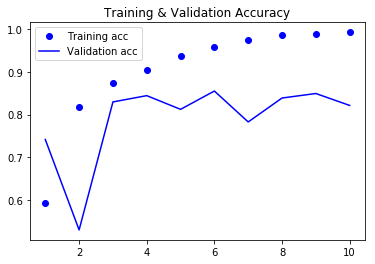

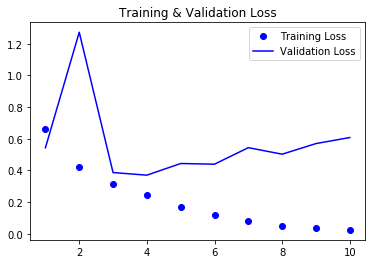

In [4]:
#################### 6.23 Training the model with Embedding and SimpleRNN layers #################################

from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
## validation acc : 85.5%

#################### 6.24 Plotting results ######################################################################

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

Model using an LSTM(Long Short-Term Memory) Layer and IMDB data

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.5227 - acc: 0.7604 - val_loss: 0.4101 - val_acc: 0.8216
Epoch 2/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.3074 - acc: 0.8784 - val_loss: 0.4224 - val_acc: 0.8086
Epoch 3/10
20000/20000 [==============================] - 96s 5ms/step - loss: 0.2410 - acc: 0.9072 - val_loss: 0.2840 - val_acc: 0.8860
Epoch 4/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2029 - acc: 0.9264 - val_loss: 0.2872 - val_acc: 0.8844
Epoch 5/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.1777 - acc: 0.9347 - val_loss: 0.3457 - val_acc: 0.8846
Epoch 6/10
20000/20000 [==============================] - 99s 5ms/step - loss: 0.1616 - acc: 0.9428 - val_loss: 0.3650 - val_acc: 0.8828
Epoch 7/10
20000/20000 [==============================] - 97s 5ms/step - loss: 0.1463 - acc: 0.9479 - val_loss: 0.3837 - val_acc

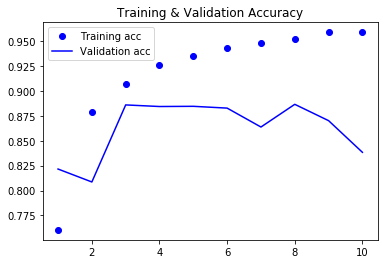

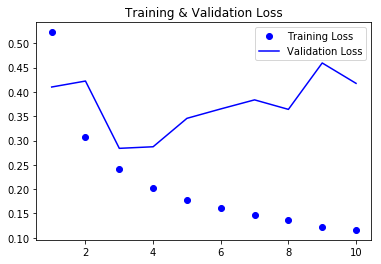

In [7]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
### Validation_acc = 87%

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

################# Numerical Timeseries Dataset for temperature-forecasting problem ################################

Weather timeseries dataset recorded at the Weather Station at the Max Planck Institute for Biogeochemistry in Jena, Germany. Dataset consist of 14 different quantities (such air temperature, atmospheric pressure,
humidity, wind direction, and so on) were recorded every 10 minutes, over several
years.

Goal: Build a model that takes as input some data from the recent past (a few days’ worth of data points) and predicts the air temperature 24 hours in the future.

In [19]:
################################ 6.28 Inspecting the data of the Jena weather dataset ###############################

import os

data_dir = '/Users/Satish/python_files/Jena_weather_dataset'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

# print(header)
# print(len(lines))
# print(len(header))

################################ 6.29 Parsing the data ##############################################################

import numpy as np
 
# float_data = np.zeros((len(lines), len(header) - 1))
# for i, line in enumerate(lines):
#     values = [float(x) for x in line.split(',')[1:]]
#     float_data[i, :] = values

##    
# print(float_data.shape) ### (420551, 14)
# float_data[1,:]

################################## 6.29 Parsing the data ##############################################################

import matplotlib.pyplot as plt

temp = float_data[:,1]
# plt.plot(range(len(temp)), temp)
range(len(temp))
# temp

### the data is recorded every 10 minutes, you get 144 data points per day.
# plt.plot(range(1440), temp[:1440]) ### first 10 days of the temperature timeseries

range(0, 420551)

############################### 6.3.2 Preparing the data ##################################################

The exact formulation of the problem is given data going as far back as timesteps (a timestep is 10 minutes lookback) and sampled every steps timesteps, can you predict the temperature in delay timesteps?

To get start, we need to do two thing:
1)Preprocess the data to a format a neural network can ingest. Data is already numerical, so there is no need of vectorization. But each timeseries in the data is on a a different scale (e.g. temperature is typically
between -20 and +30 and atmospheric pressure, measured in mbar, is around 1,000). So normalize each timeseries independently that they all take small values on a similar scale.

2)Create generator that takes the current array of float data and yields batches of data from the recent past, along with a target temperature in the future.

So there is need to preprocess the data by subtracting the mean of each timeseries and dividing by the standard deviation. we are going to use the first 200,000 timesteps as training data, so we will compute the mean and standard deviation only on this fraction of the data.


In [23]:
################################## 6.32 Normalizing the data ########################################################

mean = float_data[:200000,:].mean(axis=0)
# print(mean)
float_data -= mean
std = float_data[:200000,:].std(axis=0)
# print(std)
float_data /= std
float_data[:10,:]

array([[ 0.90014748, -1.93135845, -1.98211036, -1.86280029,  1.07285236,
        -1.30742164, -1.47375773, -0.79868641, -1.4762674 , -1.47815522,
         2.12375056, -0.72950452, -0.78067973, -0.27613603],
       [ 0.9060434 , -1.97541381, -2.02567   , -1.91582958,  1.07883061,
        -1.32042698, -1.4951961 , -0.80075238, -1.49502455, -1.49932141,
         2.17199852, -0.93124017, -0.88794488, -0.46317443],
       [ 0.90132666, -1.98671006, -2.03683914, -1.92001611,  1.10872183,
        -1.32302805, -1.49757814, -0.80281834, -1.49877598, -1.50167321,
         2.18235418, -1.27614304, -1.26122763, -0.05330633],
       [ 0.89896829, -1.96411757, -2.01338395, -1.88652392,  1.12665657,
        -1.31652538, -1.4832859 , -0.80488431, -1.48377026, -1.48756241,
         2.15764181, -1.17852902, -1.31700551,  0.25149699],
       [ 0.89896829, -1.95959907, -2.01003321, -1.8823374 ,  1.12067832,
        -1.31522484, -1.48090386, -0.80488431, -1.48377026, -1.48521061,
         2.15317004, -1.19

################################## Prepare data generator ########################################################

Data generator outputs tuple (samples, targets), where samples is one batch of input data and targets is the corresponding array of target temperatures.

It takes following parameter arguments:

data = The original array of floating-point data

lookback = number of timesteps back the input data should go (720—Observations will go back 5 days) 

delay = Number of timesteps in the future the target should be (144-Targets will be 24 hours in the future)

steps = The period, in timesteps, at which you sample data (6 Observations will be sampled at one data point per hour)

min_index & max_index = Indices in the data array that delimit which timesteps to draw from
                        (useful for keeping a segment of the data for validation and testing)
                        
batch_size = The number of samples per batch.        

shuffle = Whether to shuffle the samples or draw them in chronological order


In [25]:
######################## 6.33 Generator yielding timeseries samples and their targets ###############################

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

Let's use this generator function to instantiate three generators as below

1)Training generator looks at the first 200,000 timesteps

2)Validation generator looks at the following 100,000

3)Test generator looks at the remainder.

In [26]:
######################## 6.34 Preparing the training, validation, and test generators ###############################

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(data = float_data, 
                      lookback = lookback, 
                      delay = delay, 
                      min_index = 0, 
                      max_index = 200000, 
                      shuffle=True, 
                      batch_size=batch_size, 
                      step=step)

val_gen = generator(data = float_data, 
                      lookback = lookback, 
                      delay = delay, 
                      min_index = 200001, 
                      max_index = 300000, 
                      shuffle=True, 
                      batch_size=batch_size, 
                      step=step)

test_gen = generator(data = float_data, 
                      lookback = lookback, 
                      delay = delay, 
                      min_index = 300001, 
                      max_index = None, 
                      shuffle=True, 
                      batch_size=batch_size, 
                      step=step)

### steps to draw from val_gen in order to see the entire validation set
val_steps = (300000 -200001 - lookback)
### steps to draw from test_gen in order to see the entire test set
val_steps = (len(float_data) - 300001 - lookback)


######################## 6.3.3 A common-sense, non-machine-learning baseline ###############################

let’s use common-sense approach as It will serve as a sanity check, and it will establish a baseline that we will have to beat in order to demonstrate the usefulness of advanced machine-learning models.
for instance, the temperature timeseries can safely be assumed to be continuous (the temperatures tomorrow are likely to be close to the temperatures today) as well as periodical with a daily period. 
Thus a common-sense approach is to always predict that the temperature 24 hours from now will be equal to the temperature right now.

Evaluate this approach, using the mean absolute error (MAE) metric:  np.mean(np.abs(preds - targets))

######################## Converting the MAE back to a Celsius error ###############################
The temperature data has been normalized to be centered on 0 and have a standard deviation of 1, thus this gives an MAE of 0.29. It translates to an average absolute error of 0.29 × temperature_std degrees 

In [29]:
######################## 6.35 Computing the common-sense baseline MAE ###############################

def evalutate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = sample[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
# evalutate_naive_method()

######################## 6.36 Converting the MAE back to a Celsius error ###############################

celsius_mae = 0.29 * std[1]

######################## 6.3.4 A basic machine-learning approach ###############################

To establish a common-sense baseline before trying machine-learning approaches, we try simple, cheap machine-learning models (such as small, densely connected networks) before looking into complicated and computationally expensive models such as RNNs.

In [45]:
######################## 6.37 Training and evaluating a densely connected model ###############################

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

model = Sequential()
model.add(Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, 
                              epochs=20, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)

######################## 6.38 Plotting results ###############################

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                107552    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


###################################### 6.3.5 recurrent baseline ################################################

Instead of the LSTM layer, we will use the GRU (Gated recurrent unit) layer which work using the same principle as LSTM, but they’re somewhat streamlined and thus cheaper to run (although they may not have as much representational power as LSTM).


In [44]:
######################## 6.37 Training and evaluating a GRU-based model #####################################

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.GRU(32,input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, 
                              epochs=20, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, 32)                4512      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


####################### 6.3.6 Using recurrent dropout to fight overfitting #########################################

In order to regularize the representations formed by the recurrent gates of layers such as GRU and LSTM, a temporally constant dropout mask should be applied to the inner recurrent activations of the layer (a recurrent dropout mask).
Using the same dropout mask at every timestep allows the network to properly propagate its learning error through time; a temporally random dropout mask would disrupt this error signal and be harmful to the learning process.
Every recurrent layer in Keras has two dropout-related arguments: dropout, a float specifying the dropout rate for input units of the layer, and recurrent_dropout, specifying the dropout rate of the recurrent units.

In [43]:
######################## 6.40 Training and evaluating a dropout-regularized GRU-based model ######################

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2,input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, 
                              epochs=40, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 32)                4512      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


####################### 6.3.7 Stacking recurrent layers #########################################

The description of the universal machine-learning workflow is it’s generally a good idea to increase the capacity of your network until overfitting becomes the primary obstacle.
Increasing network capacity is typically done by increasing the number of units in the layers or adding more layers.
Recurrent layer stacking is a classic way to build more-powerful recurrent networks. all intermediate layers
should return their full sequence of outputs (a 3D tensor) rather than their output at the last timestep. This is done by specifying return_sequences=True

In [42]:
######################## 6.41 Training and evaluating a dropout-regularized, stacked GRU model #################

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, 
                              epochs=40, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, None, 32)          4512      
_________________________________________________________________
gru_11 (GRU)                 (None, 64)                18624     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


####################### 6.3.8 Using bidirectional RNNs #########################################

A bidirectional RNN is a common RNN variant that can offer greater performance than a regular RNN on certain tasks. It’s frequently used in natural-language processing. bidirectional RNN exploits the order sensitivity of RNNs using two regular RNNs, such as the GRU and LSTM layers. Each of which processes the input sequence in one direction and then merging their representations.
we need to do is write a variant of the data generator where the input sequences are reverted along the time dimension (replace the last line with yield samples[:, ::-1, :], targets).

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 9s 426us/step - loss: 0.6042 - acc: 0.6628 - val_loss: 0.5543 - val_acc: 0.7114
Epoch 2/10
20000/20000 [==============================] - 7s 334us/step - loss: 0.4856 - acc: 0.7630 - val_loss: 0.5611 - val_acc: 0.7106
Epoch 3/10
20000/20000 [==============================] - 7s 349us/step - loss: 0.4394 - acc: 0.7904 - val_loss: 0.5688 - val_acc: 0.7102
Epoch 4/10
20000/20000 [==============================] - 6s 319us/step - loss: 0.4049 - acc: 0.8140 - val_loss: 0.5956 - val_acc: 0.7076
Epoch 5/10
20000/20000 [==============================] - 6s 316us/step - loss: 0.3710 - acc: 0.8328 - val_loss: 0.6392 - val_acc: 0.7024
Epoch 6/10
20000/20000 [==============================] - 7s 347us/step - loss: 0.3380 - acc: 0.8508 - val_loss: 0.6607 - val_acc: 0.7036
Epoch 7/10
20000/20000 [==============================] - 6s 321us/step - loss: 0.3071 - acc: 0.8637 - val_loss: 0.7539 - v

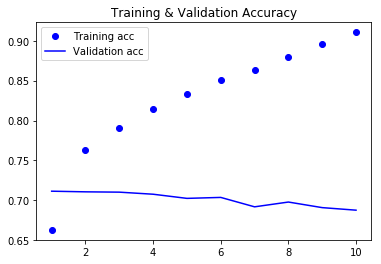

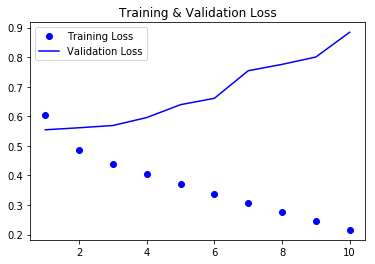

In [47]:
######################## 6.42 Training and evaluating an LSTM using reversed sequences ######################


from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers 
import matplotlib.pyplot as plt

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

### reverse the sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

### Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 354us/step - loss: 0.6165 - acc: 0.6457 - val_loss: 0.5765 - val_acc: 0.6916
Epoch 2/10
20000/20000 [==============================] - 6s 280us/step - loss: 0.4979 - acc: 0.7545 - val_loss: 0.5606 - val_acc: 0.7134
Epoch 3/10
20000/20000 [==============================] - 5s 266us/step - loss: 0.4517 - acc: 0.7884 - val_loss: 0.5526 - val_acc: 0.7150
Epoch 4/10
20000/20000 [==============================] - 5s 254us/step - loss: 0.4250 - acc: 0.8021 - val_loss: 0.5632 - val_acc: 0.7074
Epoch 5/10
20000/20000 [==============================] - 6s 281us/step - loss: 0.4021 - acc: 0.8170 - val_loss: 0.5975 - val_acc: 0.7056
Epoch 6/10
20000/20000 [==============================] - 6s 280us/step - loss: 0.3861 - acc: 0.8239 - val_loss: 0.5984 - val_acc: 0.7062
Epoch 7/10
20000/20000 [==============================] - 7s 327us/step - loss: 0.3683 - acc: 0.8373 - val_loss: 0.6319 - v

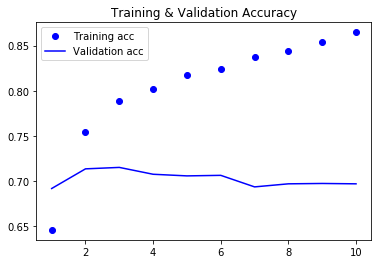

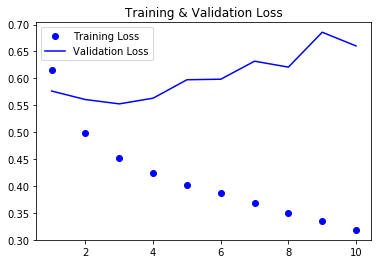

In [46]:
######################## 6.43 Training and evaluating a bidirectional LSTM ####################################


model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

In [51]:
######################## 6.44 Training a bidirectional GRU ################################################

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32),input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, 
                              epochs=20, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 64)                9024      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


######################## 6.4.2 1D pooling for sequence data ################################################

1D pooling operation is equivalent to 2D pooling operation. i.e. 1D pooling extracting patches 1D from an input
and outputting the maximum value(max pooling) or average value (average pooling).
Just as with 2D convnets, 1D convnet is used for reducing the length of 1D inputs (subsampling).

In Keras, you use a 1D convnet via the Conv1D layer, which has an interface similar to Conv2D. It takes as input 3D tensors with shape (samples, time, features) and returns similarly shaped 3D tensors. The convolution window is a 1D window on the temporal axis: axis 1 in the input tensor.

Let’s build a simple two-layer 1D convnet and apply it to the IMDB sentimentclassification task.

1Dconvnets are structured in the same way as their 2D counterparts. they consist of a stack of Conv1D and MaxPooling1D layers ending in either a global pooling layer or a layer Flatten that turn the 3D outputs into 2D outputs, allowing you to add one or more Dense layers to the model for classification or regression.

Difference between 1D and 2D covnet is with 1D you can afford to use larger convolution windows with 1D convnets.
For instance, With a 2D convolution layer, a 3 × 3 convolution window contains 3 × 3 = 9 feature vectors, but with a 1D convolution layer, a convolution window of size 3 contains only 3 feature vectors.
thus easily afford 1D convolution windows of size 7 or 9.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


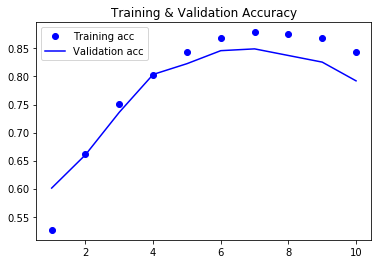

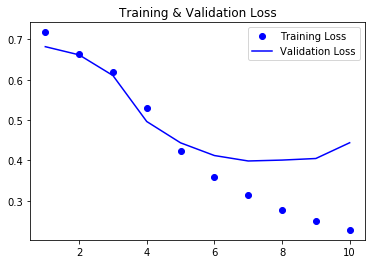

In [56]:
######################## 6.45 Preparing the IMDB data ################################################

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras import layers
import matplotlib.pyplot as plt


max_features = 10000
maxlen = 500

# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
# x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

######################## 6.46 Training and evaluating a simple 1D convnet on the IMDB data ###################

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
### Validation Accuracy = 79.22%

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training & Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training & Validation Loss")
plt.legend()

plt.show()


In [59]:

# results = model.evaluate(x_test, y_test)
test_loss, test_acc = results
print('Test Accuracy: ', test_acc)

Test Accuracy:  0.77576


#################### 6.4.4 Combining CNNs and RNNs to process long sequences #########################

As convnets process input patches independently, they aren’t sensitive to the 1D order of the timesteps.
the 1D convnet looks for patterns any where in the input timeseries and has no knowledge of the temporal position of a pattern it sees. as a result, more recent data points should be interpreted differently from older data points in the case of this specific forecasting problem. the convnet fails at producing meaningful results and this limitation of convnets.

Let's combine the speed and lightness of convnets with the order-sensitivity of RNNs is to use a 1D convnet as preprocessing step before an RNN.


In [61]:
#################### 6.48 Higher-resolution data generators for the dataset ###############

lookback = 720
step = 3
delay = 144


train_gen = generator(float_data, 
                      lookback = lookback, 
                      delay = delay, 
                      min_index = 0, 
                      max_index = 200000, 
                      shuffle=True,  
                      step=step)

val_gen = generator(float_data, 
                      lookback = lookback, 
                      delay = delay, 
                      min_index = 200001, 
                      max_index = 300000, 
                      shuffle=True, 
                      step=step)

test_gen = generator(float_data, 
                      lookback = lookback, 
                      delay = delay, 
                      min_index = 300001, 
                      max_index = None, 
                      shuffle=True, 
                      step=step)

val_steps = (300000 -200001 - lookback)
val_steps = (len(float_data) - 300001 - lookback)

In [63]:
#################### 6.49 Model combining a 1D convolutional base and a GRU layer ###############

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, 
                              epochs=20, 
                              steps_per_epoch=500, 
                              validation_data=val_gen, 
                              validation_steps=val_steps)


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_19 (GRU)                 (None, 32)                6240      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
